<a href="https://colab.research.google.com/github/SalehMehrabani/PyTorch-Deep-Learning/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision
Convolutional Neural Networks

Computer Vision Library:
* `torchvision`- base domain library for PyTorch computer vision
* `torchvision.datasets`- get datasets and data loading functions for computer vision
* `torchvision.models`- get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with ML model
* `torch.utils.data.Dataset`- Base Dataset class.
* `torch.utils.data.DataLoader`- Create apython iterable over a dataset.  


In [53]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## Getting a dataset 

In [54]:
#Setup traning data
train_data= datasets.FashionMNIST(
    root=  "data",
    train= True,
    download =True,
    transform =torchvision.transforms.ToTensor(),
    target_transform= None,
)

#Setup testing data
test_data= datasets.FashionMNIST(
    root= "data",
    train = False,
    download = True, 
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
)

In [55]:
len(train_data), len(test_data)

(60000, 10000)

In [56]:
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [57]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [58]:
class_to_idx= train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [59]:
print(f"Image Shape : [Color_channels, height, Width] :{image.shape}")
print(f"Image Label: {label}")

Image Shape : [Color_channels, height, Width] :torch.Size([1, 28, 28])
Image Label: 9


(-0.5, 27.5, 27.5, -0.5)

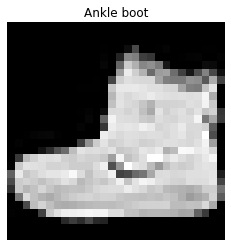

In [60]:
image, label= train_data[0]
image.shape
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

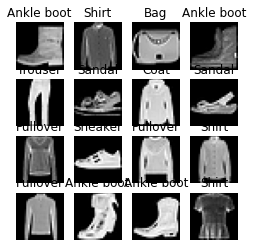

In [61]:
torch.manual_seed(42)
fig= plt.figure(figsize=(4,4))

rows=cols=4

for i in range(1, rows*cols+1):
  random_idx= torch.randint(0, len(train_data), size=[1]).item()
 
  image, label= train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [62]:
from torchvision.datasets.folder import DatasetFolder
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader= DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)
test_dataloader= DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [63]:
train_features_batch, train_labesl_batch= next(iter(train_dataloader))

In [64]:
len(train_features_batch)

32

(-0.5, 27.5, 27.5, -0.5)

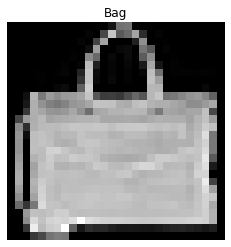

In [65]:
# torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
image, label= train_features_batch[random_idx], train_labesl_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## Building Model

In [66]:
# Create a flatten layer
flatten_model= nn. Flatten()

x= train_features_batch[0]
# [Color Channels, Height , width]
print(x.shape)

# Perform forward propagation
output= flatten_model(x) 
# [Color Channels, Height*Width]
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [67]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int, 
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )
  def forward(self, x):
    x=self.layer_stack(x)
    return(x)

In [68]:
torch.manual_seed(42)

model_0= FashionMNISTModelV0((28*28), 10, len(class_names))
model_0.cpu()

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [69]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [70]:
from helper_functions import accuracy_fn

In [71]:
loss_fn= torch.nn.CrossEntropyLoss()

optimizer= torch.optim.Adam(model_0.parameters(), lr= 1e-3)

In [72]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

##Training Model

1. Loop through each epochs
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**

In [73]:
# Import tqdm for the progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu= timer()

epochs= 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")

  #Training
  train_loss=0
  #Add a loop to loop through the training batches
  for batch, (image, label) in enumerate(train_dataloader):
    model_0.train()
    #Forward propagation
    y_pred=model_0(image)
    #Loss Function
    loss=loss_fn(y_pred, label)
    train_loss +=loss
    #Optimizer zero grad
    optimizer.zero_grad()
    #Loss backpropagation
    loss.backward()
    #optimizer step
    optimizer.step()
    # Printing What happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples")
  
  #Calculate the average train loss
  train_loss/=len(train_dataloader)

  #Testing
  test_loss, test_acc= 0, 0
  model_0.eval()
  with torch.inference_mode():
    for (test_image, test_label) in (test_dataloader):
      #forward Propagation
      test_pred = model_0(test_image)
      #Loss Function
      test_loss += loss_fn(test_pred, test_label)
      #Accuacy Function
      test_acc+= accuracy_fn(y_true=test_label,
                             y_pred=test_pred.argmax(dim=1) )
      
    #Calculate the average test loss / accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.62235 | Test loss: 0.51413, Test acc: 82.10%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.46210 | Test loss: 0.47821, Test acc: 82.82%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.43799 | Test loss: 0.46594, Test acc: 83.52%

Train time on cpu: 21.567 seconds


##Testing Model

In [74]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Forward Propagation
      y_pred = model(X)
      # Loss/ Accuracy Function
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y ,y_pred.argmax(dim=1))
    
    # Calculate average loss and accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}
       
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4659401476383209,
 'model_acc': 83.51637380191693}

In [75]:
device ='cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [76]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, 
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layers(x)
    

In [77]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(28*28, 10, len(class_names)).to(device)
model_1 , next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layers): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ), device(type='cuda', index=0))

In [78]:
from helper_functions import accuracy_fn

In [79]:
loss_fn= torch.nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model_1.parameters(), lr=1e-3)

## Functionizing Training and Testing Loop

* Training Loop Function : `train_step()`
* Testing Loop Function: `test_step()`
* Calculating Execution Time: `print_train_time`

In [80]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [81]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Put the data on the same device
      X, y= X.to(device), y.to(device)
      #Forward Propagation
      y_pred = model(X)
      # Loss/ Accuracy Function
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y ,y_pred.argmax(dim=1))
    
    # Calculate average loss and accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [82]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device =device):
  
  train_loss, train_acc = 0, 0

  #Put Model into training mode
  model.train()

  for batch, (X, y) in enumerate(data_loader):

    #Put Data on target device
    X, y = X.to(device), y.to(device)

    #Forward propagation
    y_pred = model(X)

    #Loss Function (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #Accuaray Function (per batch)
    train_acc += accuracy_fn(y_true=y, 
                           y_pred=y_pred.argmax(dim=1))

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()
  
  #Calculate the average train loss and accuracy
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  #Print out the result of training loop
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}')


In [83]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss, test_acc= 0, 0

  #Put the model on testing mode
  model.eval()

  with torch.inference_mode():
    for (test_X, test_y) in (data_loader):

      #Put the data on the same device:
      test_X, test_y = test_X.to(device), test_y.to(device)

      #forward Propagation
      test_pred = model(test_X)

      #Loss Function
      test_loss += loss_fn(test_pred, test_y)

      #Accuacy Function
      test_acc += accuracy_fn(y_true=test_y,
                             y_pred=test_pred.argmax(dim=1) )
      
    #Calculate the average test loss / accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    #Print out the result of testing loop
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")

In [84]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  #Training Model
  train_step(model = model_1, 
             data_loader = train_dataloader, 
             loss_fn = loss_fn, 
             optimizer = optimizer, 
             accuracy_fn = accuracy_fn,
             device = device)
  #Testing Model
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model = print_train_time(start = train_time_start_on_gpu,
                                          end = train_time_end_on_gpu,
                                          device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09624 | Train acc: 63.13000
Test loss: 0.95434 | Test acc: 65.56510
Epoch: 1
-------
Train loss: 0.91125 | Train acc: 67.16000
Test loss: 0.92248 | Test acc: 66.24401
Epoch: 2
-------
Train loss: 0.88316 | Train acc: 67.78333
Test loss: 0.90342 | Test acc: 66.81310
Train time on cuda: 27.227 seconds


In [85]:
model_1_results= eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device = device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9034186601638794,
 'model_acc': 66.81309904153355}

In [86]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4659401476383209,
 'model_acc': 83.51637380191693}